In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from IPython.display import Image
from sklearn.model_selection import train_test_split


In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['figure.figsize'] = (10, 6)  # 设置输出图片大小


In [20]:
#载入我们提供清洗之后的数据(clear_data.csv)，大家也将原始数据载入（train.csv）
data = pd.read_csv('../titanic/clear_data.csv')
train = pd.read_csv('../titanic/train.csv')
test = pd.read_csv("../titanic/test.csv") #导入了测试集

In [4]:
data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,2,3,26.000000,0,0,7.9250,1,0,0,0,1
3,3,1,35.000000,1,0,53.1000,1,0,0,0,1
4,4,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,886,2,27.000000,0,0,13.0000,0,1,0,0,1
887,887,1,19.000000,0,0,30.0000,1,0,0,0,1
888,888,3,29.699118,1,2,23.4500,1,0,0,0,1
889,889,1,26.000000,0,0,30.0000,0,1,1,0,0


In [5]:
train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
# 一般先取出X和y后再切割，有些情况会使用到未切割的，这时候X和y就可以用
X = data
y = train['Survived']


In [7]:
# 对数据集进行切割
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)


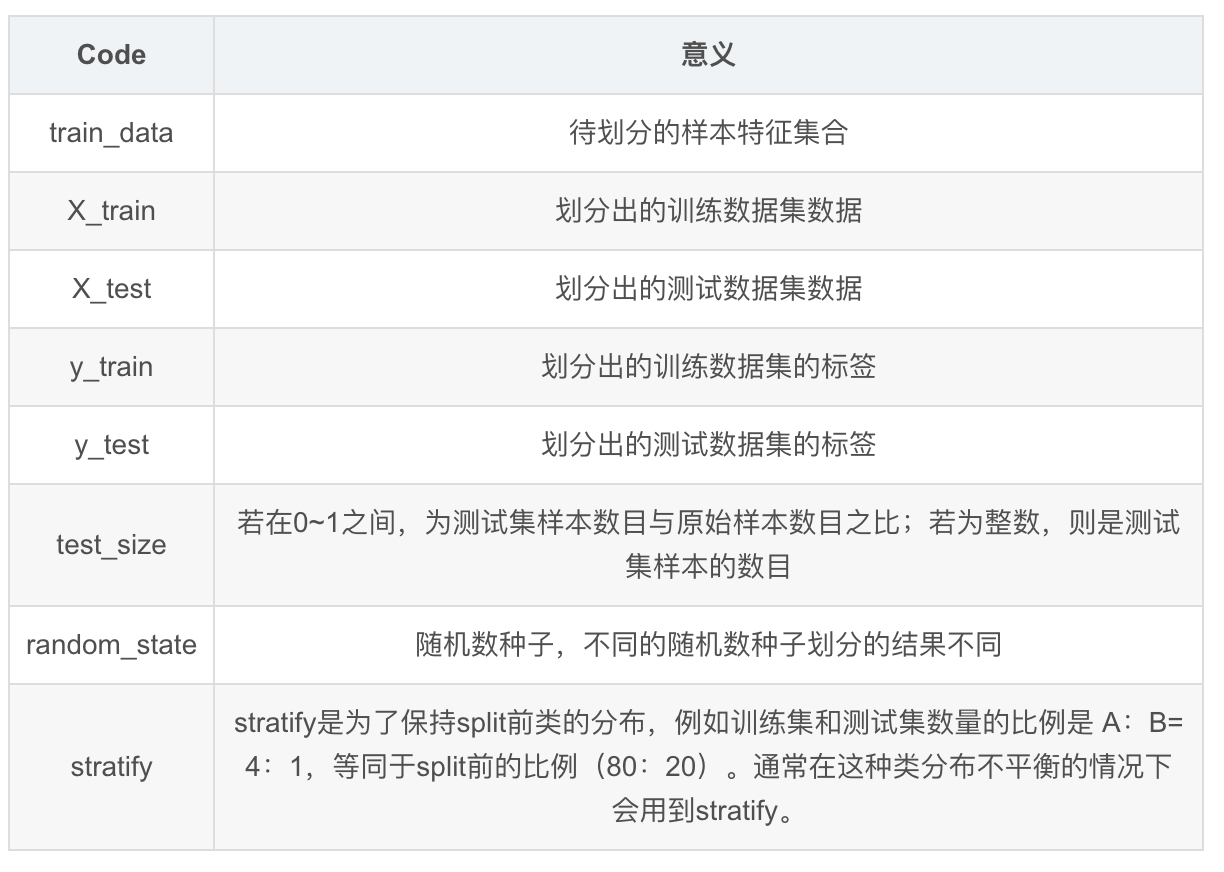

In [8]:
# 查看数据形状
X_train.shape, X_test.shape


((668, 11), (223, 11))

In [9]:
X_train


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
671,671,1,31.000000,1,0,52.0000,0,1,0,0,1
417,417,2,18.000000,0,2,13.0000,1,0,0,0,1
634,634,3,9.000000,3,2,27.9000,1,0,0,0,1
323,323,2,22.000000,1,1,29.0000,1,0,0,0,1
379,379,3,19.000000,0,0,7.7750,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
131,131,3,20.000000,0,0,7.0500,0,1,0,0,1
490,490,3,29.699118,1,0,19.9667,0,1,0,0,1
528,528,3,39.000000,0,0,7.9250,0,1,0,0,1
48,48,3,29.699118,2,0,21.6792,0,1,1,0,0


In [10]:
X_test


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
288,288,2,42.000000,0,0,13.0000,0,1,0,0,1
869,869,3,4.000000,1,1,11.1333,0,1,0,0,1
182,182,3,9.000000,4,2,31.3875,0,1,0,0,1
684,684,2,60.000000,1,1,39.0000,0,1,0,0,1
599,599,1,49.000000,1,0,56.9292,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
882,882,3,22.000000,0,0,10.5167,1,0,0,0,1
434,434,1,50.000000,1,0,55.9000,0,1,0,0,1
304,304,3,29.699118,0,0,8.0500,0,1,0,0,1
500,500,3,17.000000,0,0,8.6625,0,1,0,0,1


In [11]:
y_train


671    0
417    1
634    0
323    1
379    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Survived, Length: 668, dtype: int64

In [12]:
y_test


288    1
869    1
182    0
684    0
599    1
      ..
882    0
434    0
304    0
500    0
633    0
Name: Survived, Length: 223, dtype: int64

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [14]:
# 默认参数逻辑回归模型
lr = LogisticRegression()
lr.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
# 查看训练集和测试集score值
print("Training set score: {:.3f}".format(lr.score(X_train, y_train)))
print("Testing set score: {:.3f}".format(lr.score(X_test, y_test)))


Training set score: 0.802
Testing set score: 0.794


In [16]:
lr1 = LogisticRegression(C=1000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(lr1.score(X_train, y_train)))
print("Testing set score: {:.3f}".format(lr1.score(X_test, y_test)))


Training set score: 0.789
Testing set score: 0.785


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
lr2 = LogisticRegression(class_weight='balanced').fit(X_train, y_train)
print("Training set score: {:.3f}".format(lr2.score(X_train, y_train)))
print("Testing set score: {:.3f}".format(lr2.score(X_test, y_test)))


Training set score: 0.790
Testing set score: 0.767


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
RandomForestClassifier()
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=1000, n_features=4,
#                            n_informative=2, n_redundant=0,
#                            random_state=0, shuffle=False)
# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf.fit(X, y)
# RandomForestClassifier(...)
# print(clf.predict([[0, 0, 0, 0]]))
rf = RandomForestClassifier()
rf.fit(X_train, y_train) #用训练集拟合
pred = rf.predict(test) #尝试rf模型预测test集,但是失败了，猜测是rf模型是将embark和sex属性转换成了矩阵形式

# print("Training set score: {:.3f}".format(rf.score(X_train, y_train)))
# print("Testing set score: {:.3f}".format(rf.score(X_test, y_test)))


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Cabin
- Embarked
- Name
- Sex
- Ticket
Feature names seen at fit time, yet now missing:
- Embarked_C
- Embarked_Q
- Embarked_S
- Sex_female
- Sex_male


In [19]:
rf1 = RandomForestClassifier(n_estimators=10)
rf1.fit(X_train, y_train)
print("Training set score: {:.3f}".format(rf1.score(X_train, y_train)))
print("Testing set score: {:.3f}".format(rf1.score(X_test, y_test)))


Training set score: 0.981
Testing set score: 0.771


In [20]:
rf1 = RandomForestClassifier(n_estimators=9)
rf1.fit(X_train, y_train)
print("Training set score: {:.3f}".format(rf1.score(X_train, y_train)))
print("Testing set score: {:.3f}".format(rf1.score(X_test, y_test)))


Training set score: 0.978
Testing set score: 0.794


In [21]:
rf1 = RandomForestClassifier(n_estimators=8)
rf1.fit(X_train, y_train)
print("Training set score: {:.3f}".format(rf1.score(X_train, y_train)))
print("Testing set score: {:.3f}".format(rf1.score(X_test, y_test)))


Training set score: 0.976
Testing set score: 0.798


In [22]:
rf1 = RandomForestClassifier(n_estimators=7)
rf1.fit(X_train, y_train)
print("Training set score: {:.3f}".format(rf1.score(X_train, y_train)))
print("Testing set score: {:.3f}".format(rf1.score(X_test, y_test)))


Training set score: 0.979
Testing set score: 0.789


In [23]:
rf1 = RandomForestClassifier(n_estimators=5)
rf1.fit(X_train, y_train)
print("Training set score: {:.3f}".format(rf1.score(X_train, y_train)))
print("Testing set score: {:.3f}".format(rf1.score(X_test, y_test)))


Training set score: 0.981
Testing set score: 0.771


In [24]:
rf1 = RandomForestClassifier(n_estimators=50)
rf1.fit(X_train, y_train)
print("Training set score: {:.3f}".format(rf1.score(X_train, y_train)))
print("Testing set score: {:.3f}".format(rf1.score(X_test, y_test)))


Training set score: 0.999
Testing set score: 0.821


In [25]:
rf1 = RandomForestClassifier(n_estimators=200)
rf1.fit(X_train, y_train)
print("Training set score: {:.3f}".format(rf1.score(X_train, y_train)))
print("Testing set score: {:.3f}".format(rf1.score(X_test, y_test)))


Training set score: 1.000
Testing set score: 0.816


In [26]:
rf1 = RandomForestClassifier(max_depth=100)
rf1.fit(X_train, y_train)
print("Training set score: {:.3f}".format(rf1.score(X_train, y_train)))
print("Testing set score: {:.3f}".format(rf1.score(X_test, y_test)))


Training set score: 1.000
Testing set score: 0.825


In [27]:
rf1 = RandomForestClassifier(bootstrap=False)
rf1.fit(X_train, y_train)
print("Training set score: {:.3f}".format(rf1.score(X_train, y_train)))
print("Testing set score: {:.3f}".format(rf1.score(X_test, y_test)))


Training set score: 1.000
Testing set score: 0.789


In [28]:
rf1 = RandomForestClassifier(oob_score=True)
rf1.fit(X_train, y_train)
print("Training set score: {:.3f}".format(rf1.score(X_train, y_train)))
print("Testing set score: {:.3f}".format(rf1.score(X_test, y_test)))


Training set score: 0.999
Testing set score: 0.803


In [29]:
rf.predict(X_test)


array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0], dtype=int64)

In [30]:
rf.predict_proba(X_test)


array([[0.97, 0.03],
       [0.28, 0.72],
       [0.64, 0.36],
       [0.73, 0.27],
       [0.26, 0.74],
       [0.83, 0.17],
       [0.53, 0.47],
       [0.93, 0.07],
       [0.83, 0.17],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.58, 0.42],
       [0.52, 0.48],
       [0.83, 0.17],
       [0.04, 0.96],
       [0.04, 0.96],
       [0.92, 0.08],
       [0.89, 0.11],
       [0.48, 0.52],
       [0.15, 0.85],
       [0.1 , 0.9 ],
       [0.16, 0.84],
       [0.92, 0.08],
       [0.98, 0.02],
       [0.84, 0.16],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.3 , 0.7 ],
       [0.89, 0.11],
       [0.99, 0.01],
       [0.96, 0.04],
       [0.91, 0.09],
       [0.76, 0.24],
       [0.9 , 0.1 ],
       [0.01, 0.99],
       [0.94, 0.06],
       [0.53, 0.47],
       [0.01, 0.99],
       [0.49, 0.51],
       [1.  , 0.  ],
       [0.74, 0.26],
       [0.79, 0.21],
       [0.26, 0.74],
       [0.7 , 0.3 ],
       [0.99, 0.01],
       [0.64, 0.36],
       [0.  , 1.  ],
       [0.2 ,